In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# INITIAL PRE-PROCESSING: Label Creation & Data Customisation

In [2]:
epc_data = pd.read_excel('EPC_py.xlsx', sheet_name = 'Improvements_py')
epc_data.head()

,Property_UPRN,PROPERTY_EST_AGE,ENERGY_CONSUMPTION_CURRENT,TOTAL_FLOOR_AREA,TENURE,BUILT_FORM,PROPERTY_TYPE,Current Energy SAP,Potential Energy SAP,Number of Imp,...,Typical Saving 13,Energy SAP 13,Improvement 14,IndicativeCost14(GBP),Typical Saving 14,Energy SAP 14,Improvement 15,IndicativeCost15(GBP),Typical Saving 15,Energy SAP 15
0,1000001648,52,502,69,owner-occupied,Mid-Terrace,House,31,67,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000001948,65,180,87,owner-occupied,End-Terrace,House,76,89,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000003565,27,154,66,owner-occupied,Mid-Terrace,Flat,78,79,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000003888,103,321,44,owner-occupied,Semi-Detached,Flat,67,74,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000002428,65,227,122,owner-occupied,Semi-Detached,House,69,80,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
len(epc_data)

43828

### Shaping the dataset as retrofit-based
We will have a line for each improvement instead of a line for each property.

In [4]:
SAP_data = epc_data.reindex(epc_data.index.repeat(epc_data['Number of Imp']))

In [5]:
SAP_data.head()

,Property_UPRN,PROPERTY_EST_AGE,ENERGY_CONSUMPTION_CURRENT,TOTAL_FLOOR_AREA,TENURE,BUILT_FORM,PROPERTY_TYPE,Current Energy SAP,Potential Energy SAP,Number of Imp,...,Typical Saving 13,Energy SAP 13,Improvement 14,IndicativeCost14(GBP),Typical Saving 14,Energy SAP 14,Improvement 15,IndicativeCost15(GBP),Typical Saving 15,Energy SAP 15
0,1000001648,52,502,69,owner-occupied,Mid-Terrace,House,31,67,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1000001648,52,502,69,owner-occupied,Mid-Terrace,House,31,67,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1000001648,52,502,69,owner-occupied,Mid-Terrace,House,31,67,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1000001648,52,502,69,owner-occupied,Mid-Terrace,House,31,67,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1000001648,52,502,69,owner-occupied,Mid-Terrace,House,31,67,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
len(SAP_data)

160398

In [7]:
to_remove = ['ENERGY_CONSUMPTION_CURRENT', 'TOTAL_FLOOR_AREA', 'TENURE', 'BUILT_FORM','PROPERTY_TYPE','Current Energy SAP', 'Potential Energy SAP', 'Number of Imp', 'PROPERTY_EST_AGE', 'Initial_GDeal_Eligibility']

def remove_columns(dataset, to_remove):
    flights = dataset.copy()   
    flights = dataset.drop(to_remove, axis=1)  
    return flights

imp_data = remove_columns(SAP_data, to_remove)
imp_data.head()

,Property_UPRN,Improvement 1,IndicativeCost1(GBP),Typical Saving 1,Energy SAP 1,Improvement 2,IndicativeCost2(GBP),Typical Saving 2,Energy SAP 2,Improvement 3,...,Typical Saving 13,Energy SAP 13,Improvement 14,IndicativeCost14(GBP),Typical Saving 14,Energy SAP 14,Improvement 15,IndicativeCost15(GBP),Typical Saving 15,Energy SAP 15
0,1000001648,Floor insulation (suspended floor),1000.0,199,36,Solar water heating,5000.0,168.0,48.0,"Solar photovoltaic panels, 2.5 kWp",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1000001648,Floor insulation (suspended floor),1000.0,199,36,Solar water heating,5000.0,168.0,48.0,"Solar photovoltaic panels, 2.5 kWp",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1000001648,Floor insulation (suspended floor),1000.0,199,36,Solar water heating,5000.0,168.0,48.0,"Solar photovoltaic panels, 2.5 kWp",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1000001648,Floor insulation (suspended floor),1000.0,199,36,Solar water heating,5000.0,168.0,48.0,"Solar photovoltaic panels, 2.5 kWp",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1000001648,Floor insulation (suspended floor),1000.0,199,36,Solar water heating,5000.0,168.0,48.0,"Solar photovoltaic panels, 2.5 kWp",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
rows = list(range(0,len(imp_data)))
imp_data = imp_data.reset_index(drop = True)

##### Counting the lines with the same property to define number of retrofits + use as an index to carry the retrofits and related information such as cost and savings from rows to columns:

In [9]:
imp_data['count'] = 0

In [10]:
for row in rows:
    if row == 0:
        imp_data['count'][row] = 1
    if row > 0 and imp_data['Property_UPRN'][row] == imp_data['Property_UPRN'][row-1]:
        imp_data['count'][row] = imp_data['count'][row-1] + 1 
    else:
        imp_data['count'][row] = 1

<ipython-input-10-0991da988f26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp_data['count'][row] = 1
<ipython-input-10-0991da988f26>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp_data['count'][row] = 1
<ipython-input-10-0991da988f26>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp_data['count'][row] = imp_data['count'][row-1] + 1


In [11]:
imp_data.iloc[0, 1]

'Floor insulation (suspended floor)'

In [12]:
imp_data.iloc[0, 5] #2

'Solar water heating'

In [13]:
final_imp = imp_data.copy()

In [14]:
for row in rows:
    count = final_imp['count'][row]
    final_imp.iloc[row, 1] = imp_data.iloc[row, 4*count-3]
    final_imp.iloc[row, 2] = imp_data.iloc[row, 4*count-2]
    final_imp.iloc[row, 3] = imp_data.iloc[row, 4*count-1]
    final_imp.iloc[row, 4] = imp_data.iloc[row, 4*count]

In [15]:
for var in final_imp.columns:
    print(var, 'has \t\t\t', final_imp[var].isna().sum(), ' missing values')

Property_UPRN has 			 0  missing values
Improvement 1 has 			 291  missing values
IndicativeCost1(GBP) has 			 119  missing values
Typical Saving 1 has 			 1  missing values
 Energy SAP 1 has 			 1  missing values
Improvement 2 has 			 6274  missing values
IndicativeCost2(GBP) has 			 6274  missing values
Typical Saving 2 has 			 5783  missing values
 Energy SAP 2 has 			 5783  missing values
Improvement 3 has 			 21260  missing values
IndicativeCost3(GBP) has 			 21053  missing values
Typical Saving 3 has 			 21053  missing values
Energy SAP 3 has 			 21053  missing values
Improvement 4 has 			 48518  missing values
IndicativeCost4(GBP) has 			 48040  missing values
Typical Saving 4 has 			 48040  missing values
 Energy SAP 4 has 			 48040  missing values
Improvement 5 has 			 81696  missing values
IndicativeCost5(GBP) has 			 81304  missing values
Typical Saving 5 has 			 81304  missing values
 Energy SAP 5 has 			 81304  missing values
Improvement 6 has 			 110602  missing values
In

In [16]:
for row in rows:
    if str(final_imp['Improvement 1'][row]) == 'nan':
        final_imp['Improvement 1'][row] = imp_data['Improvement 1'][row]
        final_imp['IndicativeCost1(GBP)'][row] = imp_data['IndicativeCost1(GBP)'][row]
        final_imp['Typical Saving 1'][row] = imp_data['Typical Saving 1'][row]
        final_imp[' Energy SAP 1'][row] = imp_data[' Energy SAP 1'][row]

<ipython-input-16-0047b1c26123>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_imp['Improvement 1'][row] = imp_data['Improvement 1'][row]
<ipython-input-16-0047b1c26123>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_imp['IndicativeCost1(GBP)'][row] = imp_data['IndicativeCost1(GBP)'][row]
<ipython-input-16-0047b1c26123>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_imp['Typical Saving 1'][row] = imp_data['Typic

In [17]:
for var in final_imp.columns:
    print(var, 'has \t\t\t', final_imp[var].isna().sum(), ' missing values')

Property_UPRN has 			 0  missing values
Improvement 1 has 			 0  missing values
IndicativeCost1(GBP) has 			 0  missing values
Typical Saving 1 has 			 0  missing values
 Energy SAP 1 has 			 0  missing values
Improvement 2 has 			 6274  missing values
IndicativeCost2(GBP) has 			 6274  missing values
Typical Saving 2 has 			 5783  missing values
 Energy SAP 2 has 			 5783  missing values
Improvement 3 has 			 21260  missing values
IndicativeCost3(GBP) has 			 21053  missing values
Typical Saving 3 has 			 21053  missing values
Energy SAP 3 has 			 21053  missing values
Improvement 4 has 			 48518  missing values
IndicativeCost4(GBP) has 			 48040  missing values
Typical Saving 4 has 			 48040  missing values
 Energy SAP 4 has 			 48040  missing values
Improvement 5 has 			 81696  missing values
IndicativeCost5(GBP) has 			 81304  missing values
Typical Saving 5 has 			 81304  missing values
 Energy SAP 5 has 			 81304  missing values
Improvement 6 has 			 110602  missing values
Indica

In [18]:
final_imp.to_csv('improvements.csv')

In [19]:
# final_imp
file = open('improvements.csv')
final_imp = pd.read_csv(file)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (46,50) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [20]:
col_list = final_imp.columns.tolist()
col_list

['Unnamed: 0',
 'Property_UPRN',
 'Improvement 1',
 'IndicativeCost1(GBP)',
 'Typical Saving 1',
 ' Energy SAP 1',
 'Improvement 2',
 'IndicativeCost2(GBP)',
 'Typical Saving 2',
 ' Energy SAP 2',
 'Improvement 3',
 'IndicativeCost3(GBP)',
 'Typical Saving 3',
 'Energy SAP 3',
 'Improvement 4',
 'IndicativeCost4(GBP)',
 'Typical Saving 4',
 ' Energy SAP 4',
 'Improvement 5',
 'IndicativeCost5(GBP)',
 'Typical Saving 5',
 ' Energy SAP 5',
 'Improvement 6',
 'IndicativeCost6(GBP)',
 'Typical Saving 6',
 ' Energy SAP 6',
 'Improvement 7',
 'IndicativeCost7(GBP)',
 'Typical Saving 7',
 ' Energy SAP 7',
 'Improvement 8',
 'IndicativeCost8(GBP)',
 'Typical Saving 8',
 ' Energy SAP 8',
 'Improvement 9',
 'IndicativeCost9(GBP)',
 'Typical Saving 9',
 ' Energy SAP 9',
 'Improvement 10',
 'IndicativeCost10(GBP)',
 'Typical Saving 10',
 ' Energy SAP 10',
 'Improvement 11',
 'IndicativeCost11(GBP)',
 'Typical Saving 11',
 ' Energy SAP 11',
 'Improvement 12',
 'IndicativeCost12(GBP)',
 'Typical Sav

In [21]:
to_remove = ['Improvement 2','IndicativeCost2(GBP)', 'Typical Saving 2', ' Energy SAP 2', 'Improvement 3', 'IndicativeCost3(GBP)', 'Typical Saving 3', 'Energy SAP 3',
 'Improvement 4','IndicativeCost4(GBP)', 'Typical Saving 4', ' Energy SAP 4', 'Improvement 5', 'IndicativeCost5(GBP)', 'Typical Saving 5', ' Energy SAP 5',
 'Improvement 6', 'IndicativeCost6(GBP)', 'Typical Saving 6', ' Energy SAP 6', 'Improvement 7', 'IndicativeCost7(GBP)', 'Typical Saving 7', ' Energy SAP 7', 'Improvement 8', 'IndicativeCost8(GBP)', 'Typical Saving 8', ' Energy SAP 8', 'Improvement 9', 'IndicativeCost9(GBP)', 'Typical Saving 9', ' Energy SAP 9', 'Improvement 10',
 'IndicativeCost10(GBP)', 'Typical Saving 10', ' Energy SAP 10', 'Improvement 11', 'IndicativeCost11(GBP)', 'Typical Saving 11', ' Energy SAP 11', 'Improvement 12', 'IndicativeCost12(GBP)', 'Typical Saving 12', ' Energy SAP 12', 'Improvement 13', 'IndicativeCost13(GBP)',
 'Typical Saving 13', ' Energy SAP 13', 'Improvement 14','IndicativeCost14(GBP)', 'Typical Saving 14', 'Energy SAP 14', 'Improvement 15', 'IndicativeCost15(GBP)', 'Typical Saving 15', ' Energy SAP 15']

final_imp = remove_columns(final_imp, to_remove)
final_imp.rename(columns = {'Improvement 1':'Improvement', 'IndicativeCost1(GBP)':'Ind_Cost_GBP', 'Typical Saving 1':'Typical_Saving',' Energy SAP 1':'Post_EPC' }, inplace = True)

In [22]:
final_imp = final_imp.drop('Unnamed: 0', axis=1)

In [23]:
# adding pre-EPC
final_imp['Pre_EPC'] = 0
SAP_data = SAP_data.reset_index(drop = True)
final_imp['Current_EPC'] = SAP_data['Current Energy SAP']

In [24]:
#correcting the order of retrofits per property by sorting Post_EPCs in ascending order

final_imp = final_imp.sort_values(['Property_UPRN', 'Post_EPC'], ascending=[True, True])
final_imp.head()

,Property_UPRN,Improvement,Ind_Cost_GBP,Typical_Saving,Post_EPC,count,Pre_EPC,Current_EPC
0,1000001648,Floor insulation (suspended floor),1000.0,199.0,36.0,1,0,31
4,1000001648,High heat retention storage heaters and dual i...,2000.0,215.0,42.0,5,0,31
1,1000001648,Solar water heating,5000.0,168.0,48.0,2,0,31
3,1000001648,Replace single glazed windows with low-E doubl...,4900.0,165.0,54.0,4,0,31
5,1000001648,High performance external doors,1.0,54.0,56.0,6,0,31


In [25]:
final_imp = final_imp.reset_index(drop = True)
rows = list(range(0,len(final_imp)))

#renewing 'count' after sorting to have correct order of retrofits in the recommendation sequence
for row in rows:
    if row == 0:
        final_imp['count'][row] = 1
    if row > 0 and final_imp['Property_UPRN'][row] == final_imp['Property_UPRN'][row-1]:
        final_imp['count'][row] = final_imp['count'][row-1] + 1 
    else:
        final_imp['count'][row] = 1

<ipython-input-25-74aa4a51820d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_imp['count'][row] = 1
<ipython-input-25-74aa4a51820d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_imp['count'][row] = 1
<ipython-input-25-74aa4a51820d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_imp['count'][row] = final_imp['count'][row-1] + 1


In [26]:
#assigning pre-EPC as initial EPC for the first retrofits and post_EPC of prior for other retrofits

for row in rows:
    count = final_imp['count'][row] 
    if count == 1:
        final_imp['Pre_EPC'][row] = final_imp['Current_EPC'][row]
    else:
        final_imp['Pre_EPC'][row] = final_imp['Post_EPC'][row-1] 


<ipython-input-26-6138142bb30d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_imp['Pre_EPC'][row] = final_imp['Current_EPC'][row]
<ipython-input-26-6138142bb30d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_imp['Pre_EPC'][row] = final_imp['Post_EPC'][row-1]


In [27]:
final_imp['Pre_EPC'].astype(str).astype(float)
final_imp['Post_EPC'].astype(str).astype(float)

0          36.0
1          42.0
2          48.0
3          54.0
4          56.0
          ...  
160393     83.0
160394    102.0
160395     60.0
160396     73.0
160397     77.0
Name: Post_EPC, Length: 160398, dtype: float64

### Labelling

In [28]:
#calculationg SAPs of retrofits by post-pre_EPC to become the labels

final_imp['Imp_SAP'] = final_imp['Post_EPC'] - final_imp['Pre_EPC']

In [29]:
final_imp.to_csv('label_SAPs.csv')

In [30]:
final_imp = pd.read_csv('label_SAPs.csv')

In [31]:
final_imp.head()

,Unnamed: 0,Property_UPRN,Improvement,Ind_Cost_GBP,Typical_Saving,Post_EPC,count,Pre_EPC,Current_EPC,Imp_SAP
0,0,1000001648,Floor insulation (suspended floor),1000.0,199.0,36.0,1,31,31,5.0
1,1,1000001648,High heat retention storage heaters and dual i...,2000.0,215.0,42.0,2,36,31,6.0
2,2,1000001648,Solar water heating,5000.0,168.0,48.0,3,42,31,6.0
3,3,1000001648,Replace single glazed windows with low-E doubl...,4900.0,165.0,54.0,4,48,31,6.0
4,4,1000001648,High performance external doors,1.0,54.0,56.0,5,54,31,2.0


In [32]:
len(final_imp)

160398

In [33]:
# SAP point of an improvement is a dependent variable, adding back property info and analyse to see what it is dependent on 
# And final touches before going into data transformation:

In [34]:
final_imp.rename(columns = {'Improvement':'Retrofit', 'count':'Rank', 'Current_EPC':'Initial_EPC(SAP)', 'Imp_SAP':'Retrofit_SAP'}, inplace = True)

to_remove = ['Pre_EPC', 'Post_EPC', 'Property_UPRN']
final_imp = remove_columns(final_imp, to_remove)

In [35]:
to_add = ['ENERGY_CONSUMPTION_CURRENT', 'TOTAL_FLOOR_AREA', 'TENURE', 'BUILT_FORM','PROPERTY_TYPE', 'Potential Energy SAP', 'Number of Imp', 'PROPERTY_EST_AGE', 'Initial_GDeal_Eligibility']

for c in to_add:
    final_imp[c] = SAP_data[c]
    
final_imp.rename(columns = {'Potential Energy SAP':'Potential_EPC(SAP)', 'Number of Imp':'Num_of_Retrofits', 'Typical_Saving':'Est_Annual_Saving'}, inplace = True)

final_imp.head()

,Unnamed: 0,Retrofit,Ind_Cost_GBP,Est_Annual_Saving,Rank,Initial_EPC(SAP),Retrofit_SAP,ENERGY_CONSUMPTION_CURRENT,TOTAL_FLOOR_AREA,TENURE,BUILT_FORM,PROPERTY_TYPE,Potential_EPC(SAP),Num_of_Retrofits,PROPERTY_EST_AGE,Initial_GDeal_Eligibility
0,0,Floor insulation (suspended floor),1000.0,199.0,1,31,5.0,502,69,owner-occupied,Mid-Terrace,House,67,6,52,1
1,1,High heat retention storage heaters and dual i...,2000.0,215.0,2,31,6.0,502,69,owner-occupied,Mid-Terrace,House,67,6,52,1
2,2,Solar water heating,5000.0,168.0,3,31,6.0,502,69,owner-occupied,Mid-Terrace,House,67,6,52,1
3,3,Replace single glazed windows with low-E doubl...,4900.0,165.0,4,31,6.0,502,69,owner-occupied,Mid-Terrace,House,67,6,52,1
4,4,High performance external doors,1.0,54.0,5,31,2.0,502,69,owner-occupied,Mid-Terrace,House,67,6,52,1


In [36]:
final_imp = final_imp.drop('Unnamed: 0', axis=1)

In [37]:
final_imp = final_imp.reindex(['Retrofit', 'Ind_Cost_GBP', 'Est_Annual_Saving', 'Rank', 'Retrofit_SAP', 'Initial_EPC(SAP)', 'Potential_EPC(SAP)', 'Num_of_Retrofits', 'PROPERTY_EST_AGE', 'ENERGY_CONSUMPTION_CURRENT', 'TOTAL_FLOOR_AREA', 'Initial_GDeal_Eligibility', 'TENURE', 'BUILT_FORM', 'PROPERTY_TYPE'], axis=1)
final_imp.head()

,Retrofit,Ind_Cost_GBP,Est_Annual_Saving,Rank,Retrofit_SAP,Initial_EPC(SAP),Potential_EPC(SAP),Num_of_Retrofits,PROPERTY_EST_AGE,ENERGY_CONSUMPTION_CURRENT,TOTAL_FLOOR_AREA,Initial_GDeal_Eligibility,TENURE,BUILT_FORM,PROPERTY_TYPE
0,Floor insulation (suspended floor),1000.0,199.0,1,5.0,31,67,6,52,502,69,1,owner-occupied,Mid-Terrace,House
1,High heat retention storage heaters and dual i...,2000.0,215.0,2,6.0,31,67,6,52,502,69,1,owner-occupied,Mid-Terrace,House
2,Solar water heating,5000.0,168.0,3,6.0,31,67,6,52,502,69,1,owner-occupied,Mid-Terrace,House
3,Replace single glazed windows with low-E doubl...,4900.0,165.0,4,6.0,31,67,6,52,502,69,1,owner-occupied,Mid-Terrace,House
4,High performance external doors,1.0,54.0,5,2.0,31,67,6,52,502,69,1,owner-occupied,Mid-Terrace,House


In [38]:
final_imp.to_csv('retrofit_data.csv')

# ***Exploratory:***
- Total num of properties +
- Average age of properties +
- Average current EPC SAP +
- Avg number of imps per property +
- Total num of retrofit lines considered +
- Num of unique imps & themselves +
- unique retrofit SAP values +


- %s of property type : EXCEL, visualise
- Num of ratings A-G ; distribution : EXCEL, visualise
- Avg num of imps per EPC band : EXCEL, visualise
- %s of unique imps; retrofit frequencies,  what is the most recommended to each type of building, in each band? : got value counts in whole data below elaborate on EXCEL, pivot
- Average retrofit cost and savings :  EXCEL
- SAP point distributions of retrofits: EXCEL

In [39]:
#total num of properties in dataset
print(len(epc_data['Property_UPRN'].unique()))

43828


In [40]:
#average age of properties
epc_data['PROPERTY_EST_AGE'].mean()

64.36771013963676

In [41]:
#average current rating SAP
epc_data['Current Energy SAP'].mean()

64.5284977639865

In [42]:
#average num of retrofits per property
epc_data['Number of Imp'].mean()

3.6597152505247785

In [43]:
#total num of retrofit based data points
print(len(final_imp))

160398


In [44]:
#num of unique retrofits
print(len(final_imp['Retrofit'].unique()))

36


In [45]:
#retrofit frequencies in whole data
print(final_imp['Retrofit'].value_counts())

Solar photovoltaic panels, 2.5 kWp                                 23647
Floor insulation (suspended floor)                                 22775
Solar water heating                                                22536
Low energy lighting for all fixed outlets                          18477
Internal or external wall insulation                               13469
Replace boiler with new condensing boiler                           8416
Cavity wall insulation                                              7598
Upgrade heating controls                                            5993
Floor insulation (solid floor)                                      5139
Increase loft insulation to 270Â mm                                 4007
Replacement glazing units                                           3322
Room-in-roof insulation                                             3316
High heat retention storage heaters and dual immersion cylinder     3217
Replace single glazed windows with low-E double gla

In [46]:
#unique retrofit_SAP; *imbalaced*
print(final_imp['Retrofit_SAP'].value_counts())

1.0     42219
2.0     34400
3.0     17145
4.0     10128
5.0      6839
10.0     6533
11.0     5656
9.0      5397
6.0      5388
8.0      4904
7.0      4851
0.0      4422
12.0     3694
13.0     1925
14.0     1419
15.0     1109
16.0      755
17.0      581
18.0      480
19.0      437
20.0      347
21.0      305
22.0      256
23.0      186
24.0      184
25.0      158
26.0      135
27.0       96
28.0       78
29.0       65
30.0       61
31.0       56
32.0       41
35.0       28
33.0       27
34.0       18
36.0       14
37.0       12
38.0       10
39.0        8
40.0        7
41.0        6
42.0        3
46.0        3
45.0        3
44.0        3
43.0        2
51.0        1
52.0        1
56.0        1
50.0        1
Name: Retrofit_SAP, dtype: int64


In [47]:
#Checking if any missing values
for var in final_imp.columns:
    print(var, 'has \t\t\t', final_imp[var].isna().sum(), ' missing values')

Retrofit has 			 0  missing values
Ind_Cost_GBP has 			 0  missing values
Est_Annual_Saving has 			 0  missing values
Rank has 			 0  missing values
Retrofit_SAP has 			 0  missing values
Initial_EPC(SAP) has 			 0  missing values
Potential_EPC(SAP) has 			 0  missing values
Num_of_Retrofits has 			 0  missing values
PROPERTY_EST_AGE has 			 0  missing values
ENERGY_CONSUMPTION_CURRENT has 			 0  missing values
TOTAL_FLOOR_AREA has 			 0  missing values
Initial_GDeal_Eligibility has 			 0  missing values
TENURE has 			 0  missing values
BUILT_FORM has 			 0  missing values
PROPERTY_TYPE has 			 0  missing values


#### Transformation and Outlier Removal

In [48]:
# Transforming categorical attributes
def transform_categorical_variables(fixed_id_data, to_transform):
    transformed_data = fixed_id_data.copy()
    
    for var in to_transform:
        transformed_data = pd.concat([transformed_data.drop(var, axis=1), pd.get_dummies(transformed_data[var].values, prefix=var, drop_first=False)], axis=1)
    
    return transformed_data

In [49]:
to_transform = ['Retrofit', 'TENURE', 'BUILT_FORM', 'PROPERTY_TYPE']
transformed_imp = transform_categorical_variables(final_imp, to_transform)
transformed_imp.head(2)

,Ind_Cost_GBP,Est_Annual_Saving,Rank,Retrofit_SAP,Initial_EPC(SAP),Potential_EPC(SAP),Num_of_Retrofits,PROPERTY_EST_AGE,ENERGY_CONSUMPTION_CURRENT,TOTAL_FLOOR_AREA,...,BUILT_FORM_Enclosed End-Terrace,BUILT_FORM_Enclosed Mid-Terrace,BUILT_FORM_End-Terrace,BUILT_FORM_Mid-Terrace,BUILT_FORM_Semi-Detached,PROPERTY_TYPE_Bungalow,PROPERTY_TYPE_Flat,PROPERTY_TYPE_House,PROPERTY_TYPE_Maisonette,PROPERTY_TYPE_Park home
0,1000.0,199.0,1,5.0,31,67,6,52,502,69,...,0,0,0,1,0,0,0,1,0,0
1,2000.0,215.0,2,6.0,31,67,6,52,502,69,...,0,0,0,1,0,0,0,1,0,0


In [50]:
#Detecting and removing outliers for continuous variables
from sklearn.neighbors import LocalOutlierFactor

def detect_outliers(dataset, no_neigh, contam):
    imps_out = dataset.copy()[['Ind_Cost_GBP', 'Est_Annual_Saving', 'PROPERTY_EST_AGE', 'ENERGY_CONSUMPTION_CURRENT', 'TOTAL_FLOOR_AREA']]  
           
    loc = LocalOutlierFactor(n_neighbors = no_neigh, contamination = contam)
    outliers_loc = loc.fit_predict(imps_out)
    
    imps_out['outlier'] = pd.DataFrame(outliers_loc)
    
    return imps_out

In [51]:
#Dropping retrofit SAP outliers (retrofit SAP >20, # of data: 1827)
transformed_imp = transformed_imp.loc[transformed_imp['Retrofit_SAP'] <= 20]
transformed_imp.shape

transformed_imp = transformed_imp.reset_index(drop=True)

In [52]:
imps_out = detect_outliers(transformed_imp, 20, 0.1)
imps_out['outlier'].value_counts()

 1    142766
-1     15863
Name: outlier, dtype: int64

In [53]:
transformed_imp['outlier'] = imps_out['outlier']
imps_no_out = transformed_imp.loc[transformed_imp['outlier'] == 1]
to_remove = ['outlier']
imps_no_out = remove_columns(imps_no_out, to_remove)
len(imps_no_out)
imps_no_out = imps_no_out.reset_index(drop=True)
imps_no_out.head(2)

,Ind_Cost_GBP,Est_Annual_Saving,Rank,Retrofit_SAP,Initial_EPC(SAP),Potential_EPC(SAP),Num_of_Retrofits,PROPERTY_EST_AGE,ENERGY_CONSUMPTION_CURRENT,TOTAL_FLOOR_AREA,...,BUILT_FORM_Enclosed End-Terrace,BUILT_FORM_Enclosed Mid-Terrace,BUILT_FORM_End-Terrace,BUILT_FORM_Mid-Terrace,BUILT_FORM_Semi-Detached,PROPERTY_TYPE_Bungalow,PROPERTY_TYPE_Flat,PROPERTY_TYPE_House,PROPERTY_TYPE_Maisonette,PROPERTY_TYPE_Park home
0,1000.0,199.0,1,5.0,31,67,6,52,502,69,...,0,0,0,1,0,0,0,1,0,0
1,2000.0,215.0,2,6.0,31,67,6,52,502,69,...,0,0,0,1,0,0,0,1,0,0


In [54]:
imps_no_out['Retrofit_SAP'].value_counts()

1.0     38338
2.0     31288
3.0     15711
4.0      9214
5.0      6157
10.0     5825
11.0     4985
6.0      4847
9.0      4757
8.0      4302
7.0      4301
0.0      4083
12.0     3214
13.0     1666
14.0     1174
15.0      922
16.0      596
17.0      441
18.0      360
19.0      336
20.0      249
Name: Retrofit_SAP, dtype: int64

In [55]:
rows = list(range(0,len(imps_no_out)))

# Dimension reduction by grouping Retrofit_SAP
# 4 classes: 1-5: 0 ; 6-10: 1 ; 11-15: 2 ; 16-20: 3

imps_no_out['Retrofit_SAP_Group'] = 0
for row in rows:
    if imps_no_out['Retrofit_SAP'][row] <= 5:
        imps_no_out['Retrofit_SAP_Group'][row] = 0
    if imps_no_out['Retrofit_SAP'][row] > 5 and imps_no_out['Retrofit_SAP'][row] <= 10:
        imps_no_out['Retrofit_SAP_Group'][row] = 1
    if imps_no_out['Retrofit_SAP'][row] > 10 and imps_no_out['Retrofit_SAP'][row] <= 15:
        imps_no_out['Retrofit_SAP_Group'][row] = 2
    if imps_no_out['Retrofit_SAP'][row] > 15:
        imps_no_out['Retrofit_SAP_Group'][row] = 3

imps_no_out = imps_no_out.drop('Retrofit_SAP', axis=1)

<ipython-input-55-b12d7d30d76f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imps_no_out['Retrofit_SAP_Group'][row] = 0
<ipython-input-55-b12d7d30d76f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imps_no_out['Retrofit_SAP_Group'][row] = 1
<ipython-input-55-b12d7d30d76f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imps_no_out['Retrofit_SAP_Group'][row] = 2
<ipython-input-55-b12d7d30d76f>:15: SettingWithCopyWarning: 
A va

In [56]:
imps_no_out['Retrofit_SAP_Group'].value_counts()

0    104791
1     24032
2     11961
3      1982
Name: Retrofit_SAP_Group, dtype: int64

***may add some explo on this dist

In [57]:
#Saving final data for future use
imps_no_out.to_csv('imps_ready_2_split.csv')

***--- Dataset Ready for Pre-Modelling Phase ---***
# START HERE FOR MODEL RESET

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = open('imps_ready_2_split.csv')
imps_no_out = pd.read_csv(file)

In [21]:
imps_no_out = imps_no_out.drop('Unnamed: 0', axis=1)
imps_no_out.head()

,Ind_Cost_GBP,Est_Annual_Saving,Rank,Initial_EPC(SAP),Potential_EPC(SAP),Num_of_Retrofits,PROPERTY_EST_AGE,ENERGY_CONSUMPTION_CURRENT,TOTAL_FLOOR_AREA,Initial_GDeal_Eligibility,...,BUILT_FORM_Enclosed Mid-Terrace,BUILT_FORM_End-Terrace,BUILT_FORM_Mid-Terrace,BUILT_FORM_Semi-Detached,PROPERTY_TYPE_Bungalow,PROPERTY_TYPE_Flat,PROPERTY_TYPE_House,PROPERTY_TYPE_Maisonette,PROPERTY_TYPE_Park home,Retrofit_SAP_Group
0,1000.0,199.0,1,31,67,6,52,502,69,1,...,0,0,1,0,0,0,1,0,0,0
1,2000.0,215.0,2,31,67,6,52,502,69,1,...,0,0,1,0,0,0,1,0,0,1
2,5000.0,168.0,3,31,67,6,52,502,69,1,...,0,0,1,0,0,0,1,0,0,1
3,4900.0,165.0,4,31,67,6,52,502,69,1,...,0,0,1,0,0,0,1,0,0,1
4,4500.0,300.0,6,31,67,6,52,502,69,1,...,0,0,1,0,0,0,1,0,0,2


In [22]:
# Filtering ratings above C for dimension reduction
#imps_no_out = imps_no_out.loc[imps_no_out['Initial_EPC(SAP)'] <= 68]
#imps_no_out.shape

#imps_no_out = imps_no_out.reset_index(drop=True)
#len(imps_no_out)
#imps_no_out['Retrofit_SAP_Group'].value_counts()

***Splitting, Balancing and Standardisation***

In [23]:
#Splitting the data
from sklearn.model_selection import train_test_split

y = imps_no_out['Retrofit_SAP_Group']
X = imps_no_out.drop(['Retrofit_SAP_Group'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [24]:
# Obtaining class labels for future use 
classes = y.value_counts().index.tolist()

0    73274
1    16793
2     8454
3     1415
Name: Retrofit_SAP_Group, dtype: int64


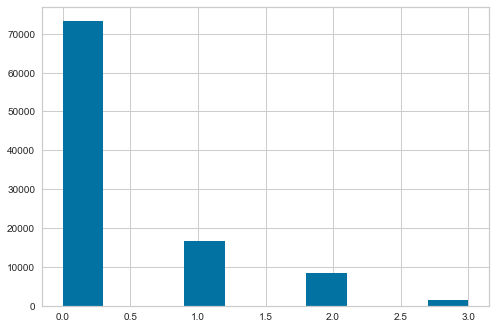

In [25]:
# Handling imbalanced data prior to modelling using SMOTE

# Visualising the imbalance first
print(y_train.value_counts())
plt.hist(y_train)
plt.show()

In [26]:
# SMOTE on Training Data
#!pip install imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from numpy import where

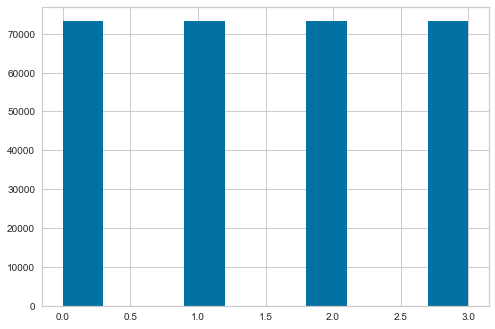

In [27]:
X_train=X_train.astype('int')
X_test=X_test.astype('int')
X=X.astype('int')

y_train=y_train.astype('int')
y_test=y_test.astype('int')
y=y.astype('int')

sm = SMOTE(k_neighbors=5)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Visualising balanced data by SMOTE
plt.hist(y_train)
plt.show()

In [28]:
print(y_train.value_counts())

0    73274
1    73274
2    73274
3    73274
Name: Retrofit_SAP_Group, dtype: int64


In [29]:
# Standardisation
from sklearn.preprocessing import StandardScaler

# Scaling the training data
# As the mean and std dev of test data is unknown, the test set is scaled with the mean and std dev of training data 
# to avoid data leakage and provide realism

X_train_st = StandardScaler().fit_transform(X_train)
X_test_st = StandardScaler().fit(X_train).transform(X_test)

***Modelling***

In [30]:
#Initial packages and metrics for model outputs
from numpy import mean
from numpy import std
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

#Visualizers
!pip install --upgrade yellowbrick --user
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [31]:
# Creating a roc_auc function for multi-class using label binarizer to avoid errors during modelling
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    y_test=y_test.astype('int')
    lb = LabelBinarizer()    
    lb.fit(y_test)
    y_test = lb.transform(y_test)    
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [32]:
# Defining stratified k-fold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=3,
                                   shuffle=True,
                                   random_state=10)

In [29]:
# Model 0: Logistic regression
from sklearn.linear_model import LogisticRegression
y_train_arr = np.array(y_train)
y_test_arr = np.array(y_test)

logistic = LogisticRegression(multi_class='multinomial',
    penalty='none',
    solver='newton-cg', C=0.5)

logi_fit = logistic.fit(X_train_st,y_train_arr)
predictions_logi = logi_fit.predict(X_test_st)

print("Accuracy: "+str(accuracy_score(y_test_arr,predictions_logi)))
print('AUC:',multiclass_roc_auc_score(y_test_arr,predictions_logi))

Accuracy: 0.8468596777959374
AUC: 0.801934934344894


In [30]:
accuracy = cross_val_score(logistic, X_train_st, y_train_arr, scoring='accuracy', cv = stratified_kfold)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)
test_score = cross_val_score(logistic, X_test_st, y_test_arr, scoring='accuracy', cv = stratified_kfold)
print("Test score:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 74.15636006224916
Test score: 74.15636006224916


In [31]:
y_train_arr = np.array(y_train)
y_test_arr = np.array(y_test)
f1 = f1_score(y_test_arr, predictions_logi, average="micro")
print(f1)

0.8468596777959374


In [32]:
f1 = f1_score(y_test_arr, predictions_logi, average="macro")
print(f1)

0.6047783138099563


In [16]:
# Model 1: Decision trees - Random forest and Gradient Boosting
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
# Model 1: Random Forest
rf = RandomForestClassifier(n_estimators = 800)

rf.fit(X_train_st,y_train.values.ravel())
prediction_rf = rf.predict(X_test_st)

print('Accuracy:', accuracy_score(y_test,prediction_rf))
print('AUC:',multiclass_roc_auc_score(y_test,prediction_rf))

Accuracy: 0.8610553350455288
AUC: 0.7939561120453216


In [52]:
print('Prediction:',prediction_rf[0:20])

Prediction: [0 0 0 2 3 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0]


In [53]:
unique, counts = np.unique(prediction_rf, return_counts=True)
dict(zip(unique, counts))

{0: 30895, 1: 8282, 2: 3093, 3: 560}

In [54]:
accuracy = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv = stratified_kfold)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)
test_score = cross_val_score(rf, X_test, y_test, scoring='accuracy', cv = stratified_kfold)
print("Test score:",accuracy.mean() * 100)

KeyboardInterrupt: 

In [ ]:
y_train_arr = np.array(y_train)
y_test_arr = np.array(y_test)
f1 = f1_score(y_test_arr, prediction_rf, average="micro")
print(f1)

In [ ]:
f1 = f1_score(y_test_arr, prediction_rf, average="macro")
print(f1)

In [55]:
# Random forest - 5 most important features
print('Random Forest')
for c, column in enumerate(X.columns):
    if rf.feature_importances_[c] in sorted(rf.feature_importances_)[-5:]:
        print('Variable',column,rf.feature_importances_[c])

Random Forest
Variable Ind_Cost_GBP 0.060445127441778455
Variable Est_Annual_Saving 0.296293129014896
Variable Initial_EPC(SAP) 0.10050677573880307
Variable ENERGY_CONSUMPTION_CURRENT 0.07523468106696583
Variable TOTAL_FLOOR_AREA 0.0638552981886528


KeyboardInterrupt: 

Text(0.5, 0, 'Random Forest Feature Importance')

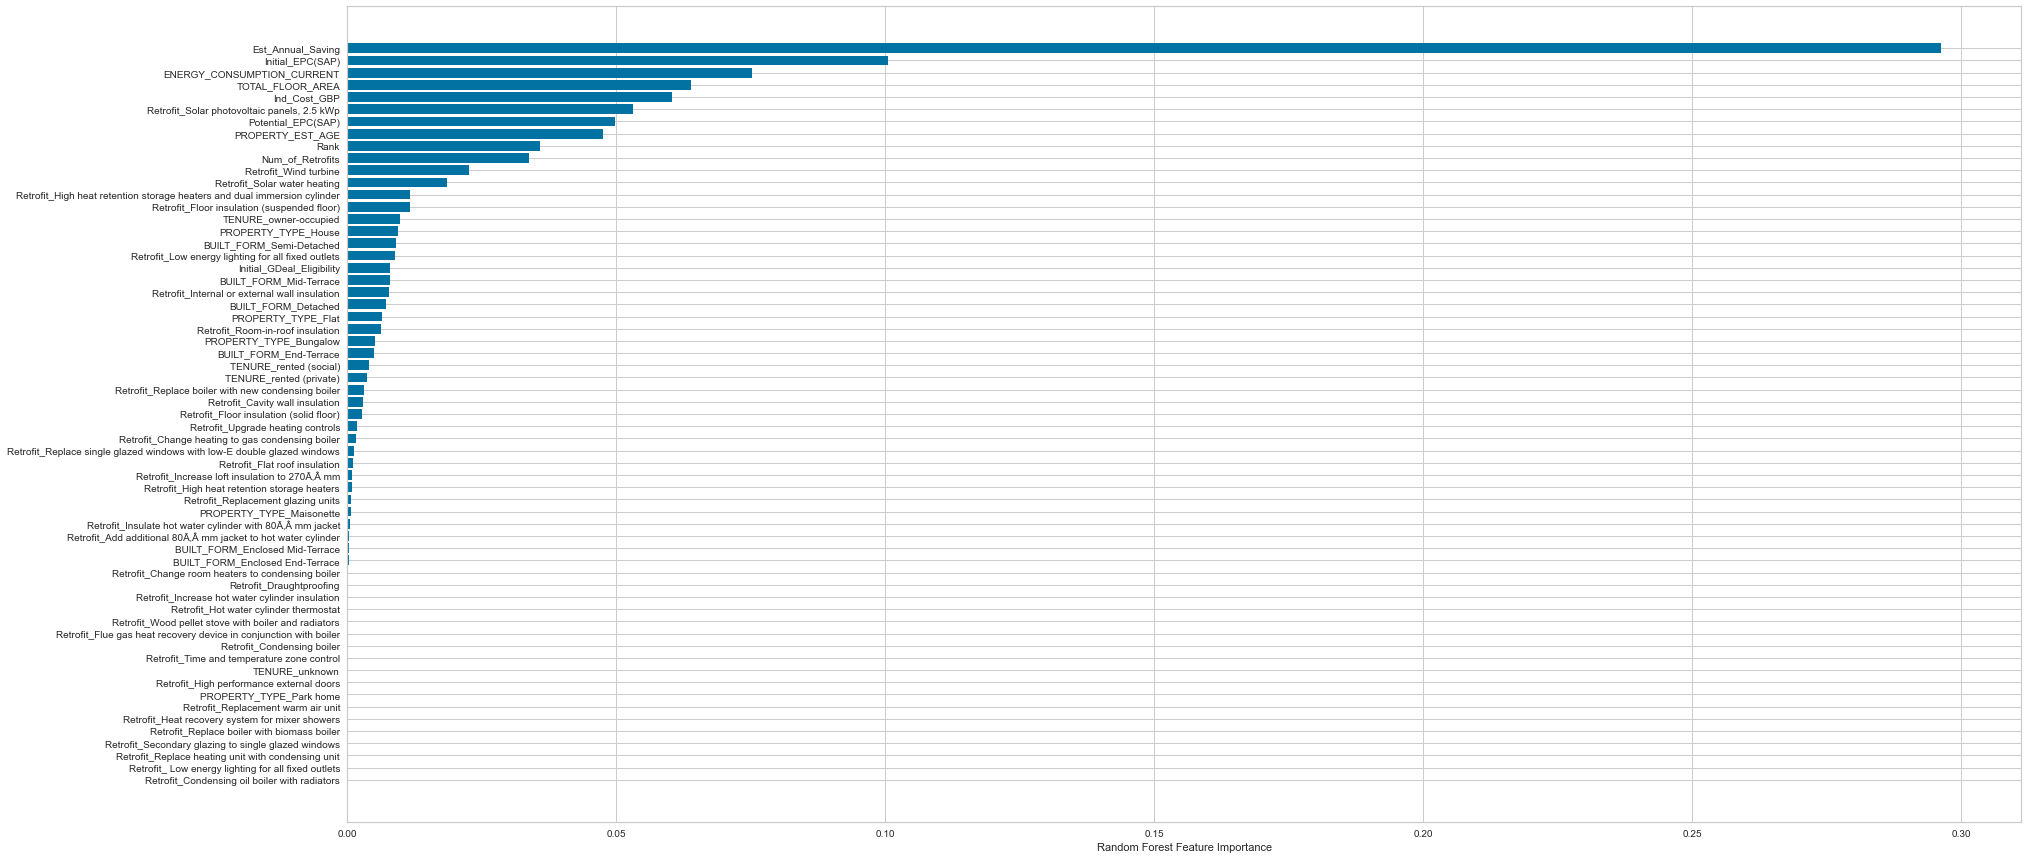

In [56]:
sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize=(30,15))
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import plot_tree
rf = RandomForestClassifier(n_estimators = 900, max_depth=20)
rf.fit(X_train_st,y_train.values.ravel())

IndexError: list index out of range

[Text(0.5062974624853136, 0.9761904761904762, 'X[40] <= 0.421\ngini = 0.75\nsamples = 185166\nvalue = [73133, 73683, 73420, 72860]'),
 Text(0.34970210941922325, 0.9285714285714286, 'X[3] <= 0.175\ngini = 0.714\nsamples = 128453\nvalue = [72275, 38030, 26142, 66713]'),
 Text(0.26811329751837987, 0.8809523809523809, 'X[24] <= 1.882\ngini = 0.67\nsamples = 78254\nvalue = [20514, 20827, 21101, 61055]'),
 Text(0.2132151092718428, 0.8333333333333334, 'X[44] <= 1.499\ngini = 0.691\nsamples = 69332\nvalue = [20466, 20102, 18557, 50259]'),
 Text(0.15592957902387167, 0.7857142857142857, 'X[2] <= -0.815\ngini = 0.728\nsamples = 57369\nvalue = [20452, 19677, 16515, 33873]'),
 Text(0.10055688465069774, 0.7380952380952381, 'X[20] <= 1.868\ngini = 0.648\nsamples = 30336\nvalue = [2992, 10119, 10727, 24159]'),
 Text(0.0780490758283698, 0.6904761904761905, 'X[7] <= 2.164\ngini = 0.632\nsamples = 29130\nvalue = [2418, 8789, 10706, 24157]'),
 Text(0.04863937076186289, 0.6428571428571429, 'X[3] <= -0.372\

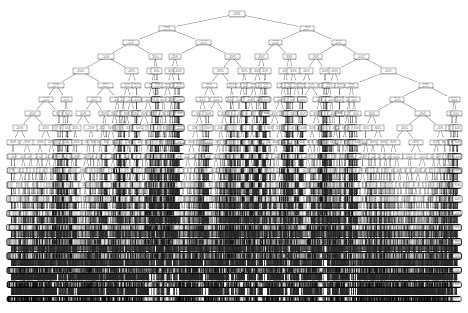

In [44]:
tree.plot_tree(rf.estimators_[0])

[Text(0.5062974624853136, 0.9761904761904762, 'X[40] <= 0.421\ngini = 0.75\nsamples = 185166\nvalue = [73133, 73683, 73420, 72860]'),
 Text(0.34970210941922325, 0.9285714285714286, 'X[3] <= 0.175\ngini = 0.714\nsamples = 128453\nvalue = [72275, 38030, 26142, 66713]'),
 Text(0.26811329751837987, 0.8809523809523809, 'X[24] <= 1.882\ngini = 0.67\nsamples = 78254\nvalue = [20514, 20827, 21101, 61055]'),
 Text(0.2132151092718428, 0.8333333333333334, 'X[44] <= 1.499\ngini = 0.691\nsamples = 69332\nvalue = [20466, 20102, 18557, 50259]'),
 Text(0.15592957902387167, 0.7857142857142857, 'X[2] <= -0.815\ngini = 0.728\nsamples = 57369\nvalue = [20452, 19677, 16515, 33873]'),
 Text(0.10055688465069774, 0.7380952380952381, 'X[20] <= 1.868\ngini = 0.648\nsamples = 30336\nvalue = [2992, 10119, 10727, 24159]'),
 Text(0.0780490758283698, 0.6904761904761905, 'X[7] <= 2.164\ngini = 0.632\nsamples = 29130\nvalue = [2418, 8789, 10706, 24157]'),
 Text(0.04863937076186289, 0.6428571428571429, 'X[3] <= -0.372\

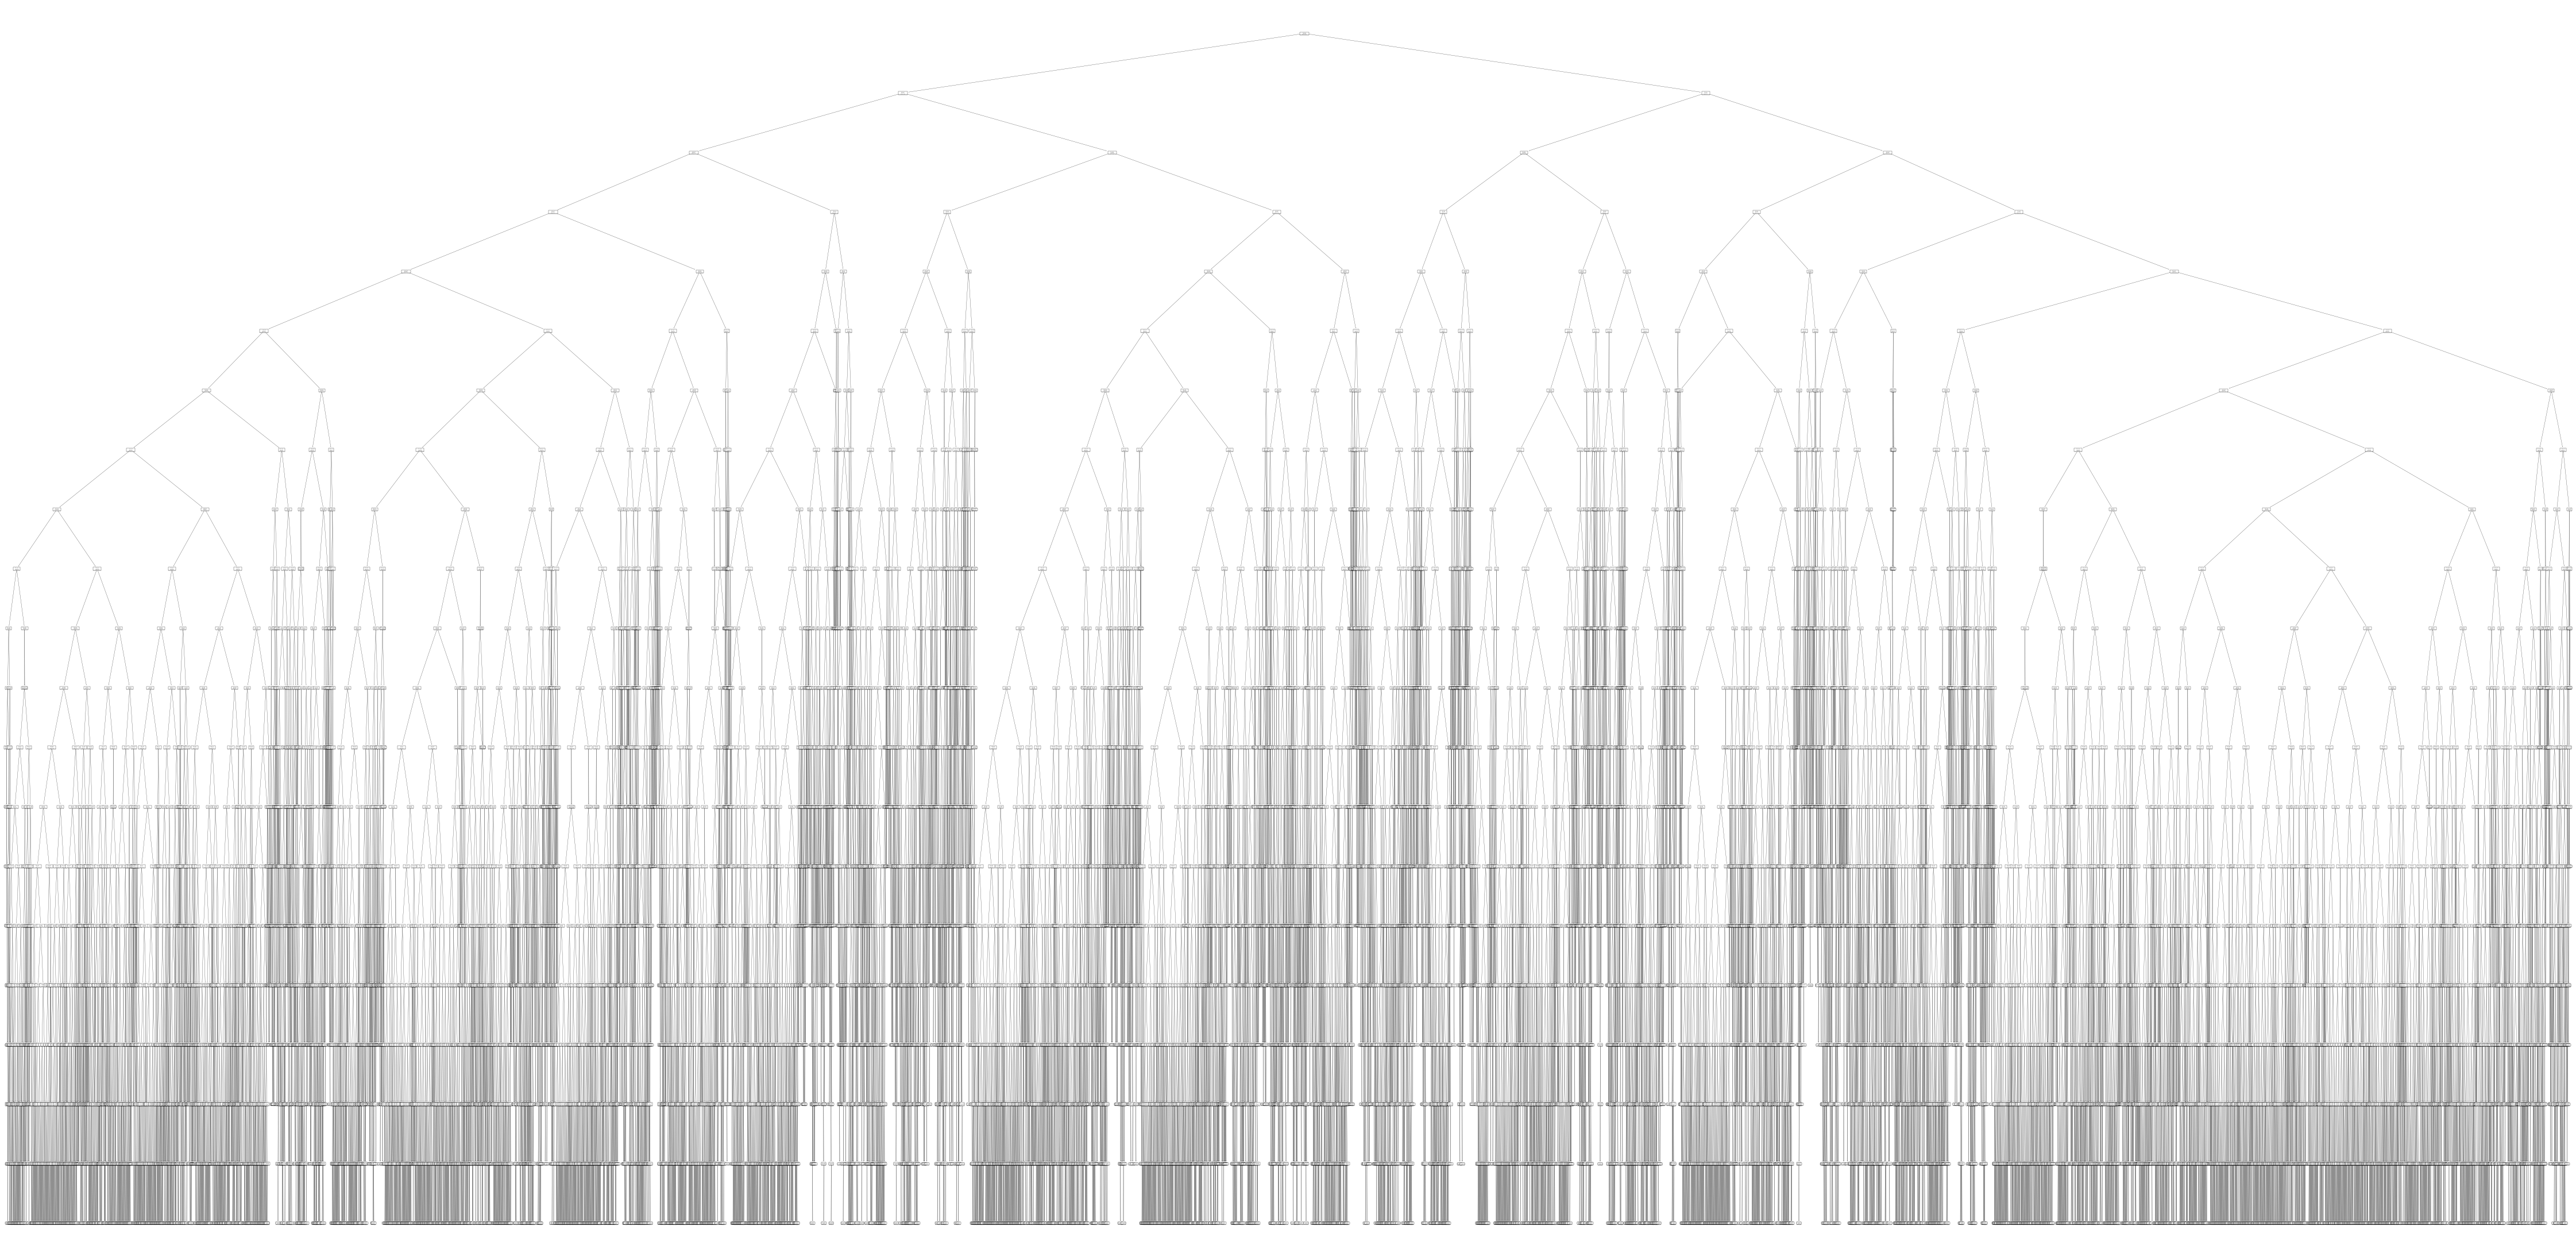

In [46]:
plt.figure(figsize=(80,40))
tree.plot_tree(rf.estimators_[0])

In [83]:
# Model 2: Gradient Boosted Trees
gradient = GradientBoostingClassifier(n_estimators = 800)
gradient.fit(X_train_st,y_train.values.ravel())
prediction_gradient = gradient.predict(X_test_st)
prediction_prob = gradient.predict_proba(X_test_st)

print('Accuracy:', accuracy_score(y_test,prediction_gradient))
print('AUC:', multiclass_roc_auc_score(y_test,prediction_gradient))

Accuracy: 0.860915246322671
AUC: 0.8174775013315554


In [84]:
accuracy = cross_val_score(gradient, X_train, y_train, scoring='accuracy', cv = stratified_kfold)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)
test_score = cross_val_score(gradient, X_test, y_test, scoring='accuracy', cv = stratified_kfold)
print("Test score:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 79.89557739557739
Test score: 79.89557739557739


In [85]:
f1 = f1_score(y_test, prediction_gradient, average="micro")
print(f1)

0.860915246322671


In [86]:
f1 = f1_score(y_test, prediction_gradient, average="macro")
print(f1)

0.6523956581021789


In [88]:
# Gradient Boost - 5 most important features
print('Gradient Boost')
for c, column in enumerate(X.columns):
    if gradient.feature_importances_[c] in sorted(gradient.feature_importances_)[-5:]:
        print('Variable',column,gradient.feature_importances_[c])

Gradient Boost
Variable Ind_Cost_GBP 0.014344858266501143
Variable Est_Annual_Saving 0.7995284940210946
Variable Rank 0.012881499744870841
Variable Initial_EPC(SAP) 0.027669613448691562
Variable Retrofit_Solar photovoltaic panels, 2.5 kWp 0.07842225607408376


In [89]:
# Model 3: Neural Network
!pip install tensorflow --user --no-warn-script-location
!pip install keras --user --no-warn-script-location
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import Adam
import keras
from keras import metrics

In [90]:
# For neural network we need the multilabel version of the dataset with binary target variables:
to_transform = ['Retrofit_SAP_Group']
imps_neural = transform_categorical_variables(imps_no_out, to_transform)
imps_neural.columns

Index(['Ind_Cost_GBP', 'Est_Annual_Saving', 'Rank', 'Initial_EPC(SAP)',
       'Potential_EPC(SAP)', 'Num_of_Retrofits', 'PROPERTY_EST_AGE',
       'ENERGY_CONSUMPTION_CURRENT', 'TOTAL_FLOOR_AREA',
       'Initial_GDeal_Eligibility',
       'Retrofit_ Low energy lighting for all fixed outlets',
       'Retrofit_Add additional 80Ã‚Â mm jacket to hot water cylinder',
       'Retrofit_Cavity wall insulation',
       'Retrofit_Change heating to gas condensing boiler',
       'Retrofit_Change room heaters to condensing boiler',
       'Retrofit_Condensing boiler',
       'Retrofit_Condensing oil boiler with radiators',
       'Retrofit_Draughtproofing', 'Retrofit_Flat roof insulation',
       'Retrofit_Floor insulation (solid floor)',
       'Retrofit_Floor insulation (suspended floor)',
       'Retrofit_Flue gas heat recovery device in conjunction with boiler',
       'Retrofit_Heat recovery system for mixer showers',
       'Retrofit_High heat retention storage heaters',
       'Retrofit_

In [236]:
y = imps_neural[['Retrofit_SAP_Group_0', 'Retrofit_SAP_Group_1', 'Retrofit_SAP_Group_2', 'Retrofit_SAP_Group_3']]
X = imps_neural.drop(['Retrofit_SAP_Group_0', 'Retrofit_SAP_Group_1', 'Retrofit_SAP_Group_2', 'Retrofit_SAP_Group_3'],axis=1)

y = np.array(y)

#pca
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

X_train=X_train.astype('int32')
X_test=X_test.astype('int32')
X=X.astype('int32')

y_train=y_train.astype('int32')
y_test=y_test.astype('int32')
y=y.astype('int32')

sm = SMOTE(k_neighbors=5)
X_train, y_train = sm.fit_resample(X_train, y_train)

X_train_st = StandardScaler().fit_transform(X_train)
X_test_st = StandardScaler().fit(X_train).transform(X_test)

In [225]:
from tensorflow.keras.layers import Dropout

input_dim = X_train_st.shape[1]
output_dim = 4

model = Sequential()
model.add(Dense(80,input_dim=input_dim, kernel_regularizer='l2'))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(80))
model.add(Activation('relu'))
model.add(Dense(80))
model.add(Activation('relu'))
model.add(Dense(80))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(4))
model.add(Activation('sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Using keras callbacks' EarlyStopping to optimise number of epochs and prevent overfitting

from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 10,
                                        restore_best_weights = True)

history = model.fit(X_train_st, y_train, 
                    epochs = 30, validation_data =(X_test_st, y_test), 
                    callbacks =[earlystopping])


model.summary()
#model.fit(X_train,y_train,epochs=20)

Epoch 1/30
9169/9169 [==============================] - 40s 4ms/step - loss: 0.2859 - accuracy: 0.7382 - val_loss: 0.1620 - val_accuracy: 0.8442
Epoch 2/30
9169/9169 [==============================] - 32s 3ms/step - loss: 0.2644 - accuracy: 0.7487 - val_loss: 0.1578 - val_accuracy: 0.8502
Epoch 3/30
9169/9169 [==============================] - 32s 3ms/step - loss: 0.2601 - accuracy: 0.7518 - val_loss: 0.1554 - val_accuracy: 0.8522
Epoch 4/30
9169/9169 [==============================] - 35s 4ms/step - loss: 0.2586 - accuracy: 0.7535 - val_loss: 0.1579 - val_accuracy: 0.8523
Epoch 5/30
9169/9169 [==============================] - 38s 4ms/step - loss: 0.2575 - accuracy: 0.7562 - val_loss: 0.1596 - val_accuracy: 0.8519
Epoch 6/30
9169/9169 [==============================] - 34s 4ms/step - loss: 0.2562 - accuracy: 0.7574 - val_loss: 0.1575 - val_accuracy: 0.8478
Epoch 7/30
9169/9169 [==============================] - 43s 5ms/step - loss: 0.2550 - accuracy: 0.7588 - val_loss: 0.1552 - val_ac

In [226]:
prediction_prob = model.predict(X_test_st)
prediction_class = (prediction_prob > 0.25).astype('int')

In [227]:
print('AUC:',roc_auc_score(y_test,prediction_prob))

AUC: 0.9571229260895707


In [228]:
y_test

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0]])

In [229]:
prediction_class = np.argmax(prediction_class, axis=1)
y_test = np.argmax(y_test, axis=1)

In [230]:
y_test

array([0, 0, 0, ..., 0, 2, 1], dtype=int64)

In [234]:
y_train = np.argmax(y_train, axis=1)

In [232]:
f1 = f1_score(y_test, prediction_class, average="micro")
print(f1)

0.8514359094092926


In [233]:
f1 = f1_score(y_test, prediction_class, average="macro")
print(f1)

0.5529475137089266


***Model Performance Comparison with Visualisations***

In [1]:
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

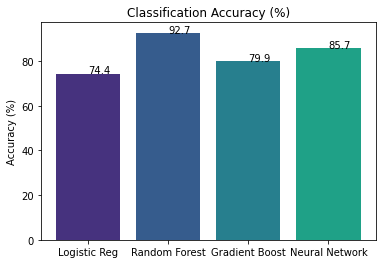

In [12]:
#Accuracy
models = 'Logistic Reg','Random Forest', 'Gradient Boost', 'Neural Network'
accuracies = [74.4, 92.7, 79.9, 85.7]

colors = sns.color_palette("viridis", as_cmap=False)

def addlabels(models,accuracies):
    for i in range(len(models)):
        plt.text(i,accuracies[i],accuracies[i])

plt.bar(models, accuracies, align='center', color=colors)
addlabels(models, accuracies)
plt.xticks(models)
plt.ylabel('Accuracy (%)')
plt.title('Classification Accuracy (%)')
plt.show()

In [33]:
#AUC&F-Score
models = ['Logistic Reg','Random Forest', 'Gradient Boost', 'Neural Network']
ROC_AUC = [0.80, 0.80, 0.82, 0.96]
f1_micro = [0.85, 0.86, 0.86, 0.85]
f1_macro = [0.61, 0.64, 0.65, 0.55]

data = {'Models': models, 'ROC/AUC Score': ROC_AUC, 'Micro F1-Score': f1_micro, 'Macro F1-Score': f1_macro}

pd.DataFrame(data=data).set_index('Models').transpose()

Models,Logistic Reg,Random Forest,Gradient Boost,Neural Network
ROC/AUC Score,0.80,0.80,0.82,0.96
Micro F1-Score,0.85,0.86,0.86,0.85
Macro F1-Score,0.61,0.64,0.65,0.55


In [40]:
from sklearn.ensemble import RandomForestClassifier

classifiers = [RandomForestClassifier(n_estimators = 800),
               RandomForestClassifier(n_estimators = 800, min_samples_leaf=5000),
              RandomForestClassifier(n_estimators = 850, min_samples_leaf=15000)]

In [41]:
classes = "0: 1-5 SAP points","1: 6-10 SAP points","2: 11-15 SAP points","3: 16-20 SAP points"
# Classification report
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        Class_report(name,classes)

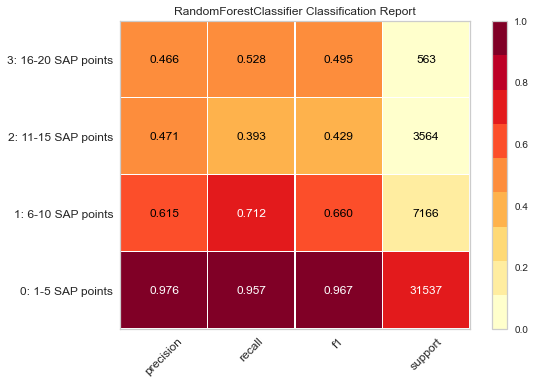

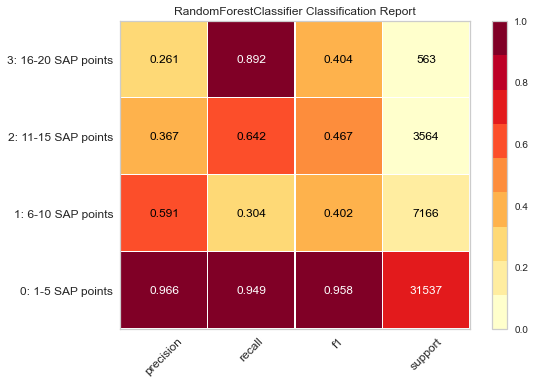

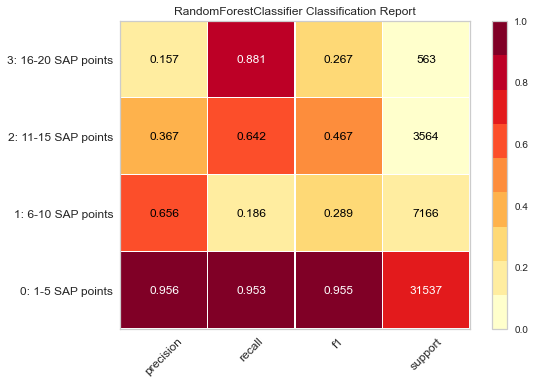

In [42]:
visualization =[CR_viz()]

In [43]:
#Confusion matrix
def CM_viz():    
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes,percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CM(name,classes)

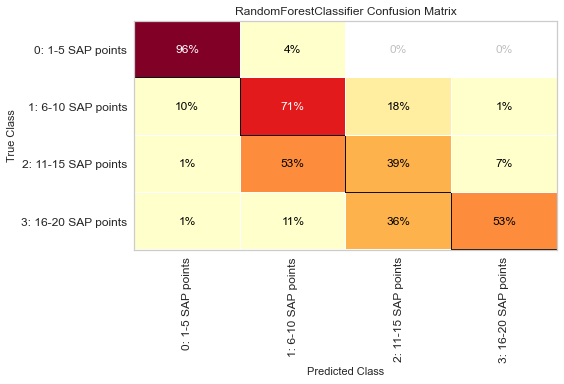

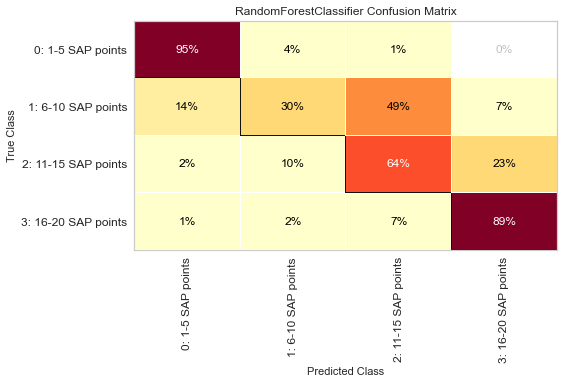

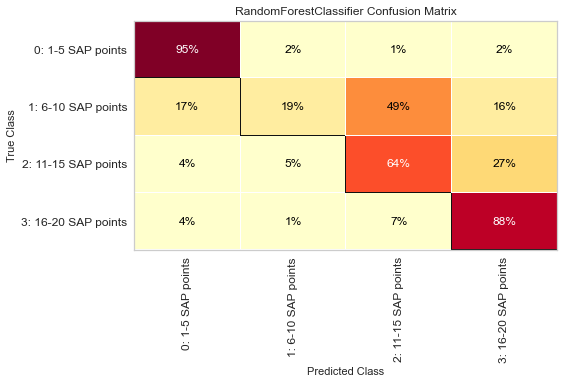

In [44]:
visualization =[CM_viz()]

In [83]:
classifiers = [RandomForestClassifier(n_estimators = 900, max_depth=20),
               RandomForestClassifier(n_estimators = 900, max_depth=50)]

In [84]:
classes = "0: 1-5 SAP points","1: 6-10 SAP points","2: 11-15 SAP points","3: 16-20 SAP points"
# Classification report
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        Class_report(name,classes)

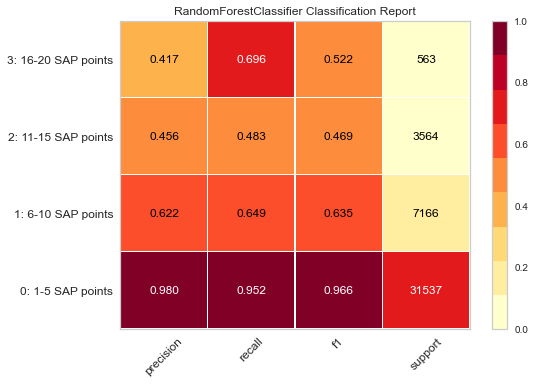

In [ ]:
visualization =[CR_viz()]

In [ ]:
#Confusion matrix
def CM_viz():    
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes,percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CM(name,classes)

In [ ]:
visualization =[CM_viz()]

In [39]:
# For prediction insights